## Thresholding

**Thresholding** is one of the simplest and most effective techniques for **image segmentation** and **intensity-based enhancement**.  
It converts a grayscale image into a **binary image** by comparing each pixel intensity to a predefined threshold.

---

### Concept

The basic idea is straightforward:

If a pixel’s intensity is greater than a certain threshold, it is set to one value (often white); otherwise, it is set to another (often black).

```
s = T(r)
```

where

* `r`: input intensity value
* `s`: output intensity value
* `T`: transformation function applied to each pixel

**S =**
   - **1** if T(r) > T
   - **0** , otherwise

---

## Types of Thresholding

| Type | Description | Example Use |
|------|--------------|--------------|
| **Global Thresholding** | A single threshold value T is applied to the whole image. | Well-illuminated, uniform lighting images |
| **Adaptive Thresholding** | The threshold varies over different regions based on local statistics (mean, median, etc.). | Uneven lighting or shadows |

---

## Applications

* Document binarization (text extraction)  
* Medical imaging (tumor segmentation)  
* Industrial inspection (defect detection)  
* Object detection and edge isolation  

---

## Key Insights

* Simple yet powerful for separating foreground and background.  
* Performance depends heavily on **lighting** and **contrast** conditions.  
* Adaptive and Otsu methods are preferred for **non-uniform illumination**.

---

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. Read and preprocess image and convert to grayscale

In [94]:
image = cv2.imread("Images/0_0_Image.jpg")
image.shape

(3456, 5184, 3)

3 channels --> RGB(Red, Green , Blue)

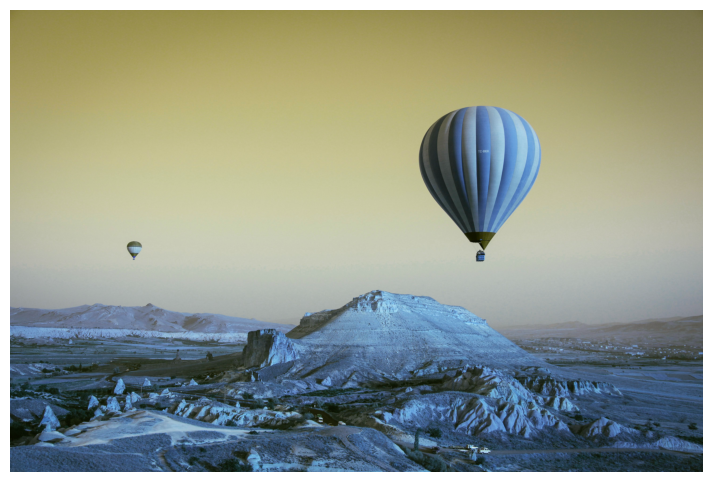

In [95]:
plt.figure(figsize= (10,6))
plt.imshow(image)
plt.axis("off")
plt.show()

<figure>
  <img src="Images/0_0_Image.jpg" alt="Threshold Example" width="700"/>
  <figcaption>the original image.</figcaption>
</figure>


> ⚠️ **Note:**  
> If the colors in your displayed images look incorrect (e.g., bluish or distorted), this happens because **OpenCV reads images in BGR format**, while **Matplotlib expects RGB**.  
>  
> To fix this, convert the image before displaying it:
> ```python
> image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
> plt.imshow(image_rgb)
> ```
> Now, the colors will appear correctly.


> Converting from **BGR** to **RGB**

In [96]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

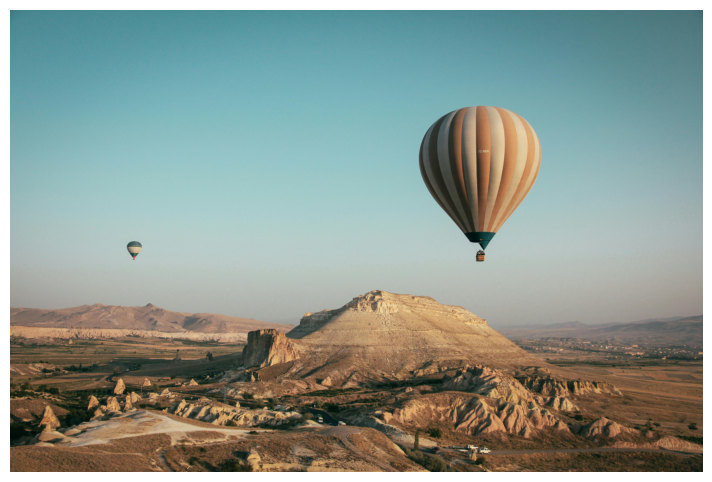

In [97]:
plt.figure(figsize= (10,6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [98]:
image_grayscale = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

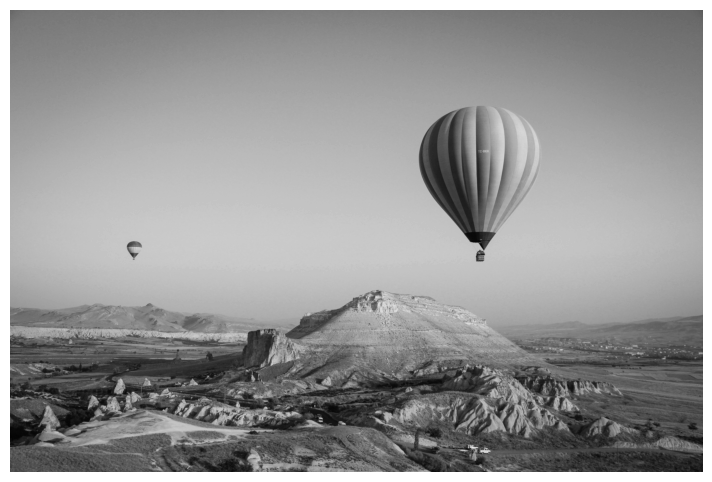

In [99]:
plt.figure(figsize= (10,6))
plt.imshow(image_grayscale, cmap = "gray")
plt.axis("off")
plt.show()

#### 2. Apply different thresholding techniques

- **ThresholdTypes (by importance):**  
  `THRESH_BINARY`, `THRESH_BINARY_INV`, `THRESH_OTSU`, `THRESH_TRIANGLE`, `THRESH_TOZERO`, `THRESH_TOZERO_INV`, `THRESH_TRUNC`

- **AdaptiveThresholdTypes:**  
  `ADAPTIVE_THRESH_GAUSSIAN_C`, `ADAPTIVE_THRESH_MEAN_C`

Typically, THRESH_BINARY and THRESH_OTSU are the most used, while adaptive methods (GAUSSIAN_C) are best for images with uneven lighting.

##### (a) Global Thresholding

In [100]:
T = 100
_, th_binary = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_BINARY)
_, th_inv_binary = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_BINARY_INV)
_, th_otsu = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_OTSU)
_, th_triangle = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_TRIANGLE)
_, th_tozero = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_TOZERO)
_, th_inv_tozero = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_TOZERO_INV)
_, th_trunc = cv2.threshold(image_grayscale, T, 255, cv2.THRESH_TRUNC)

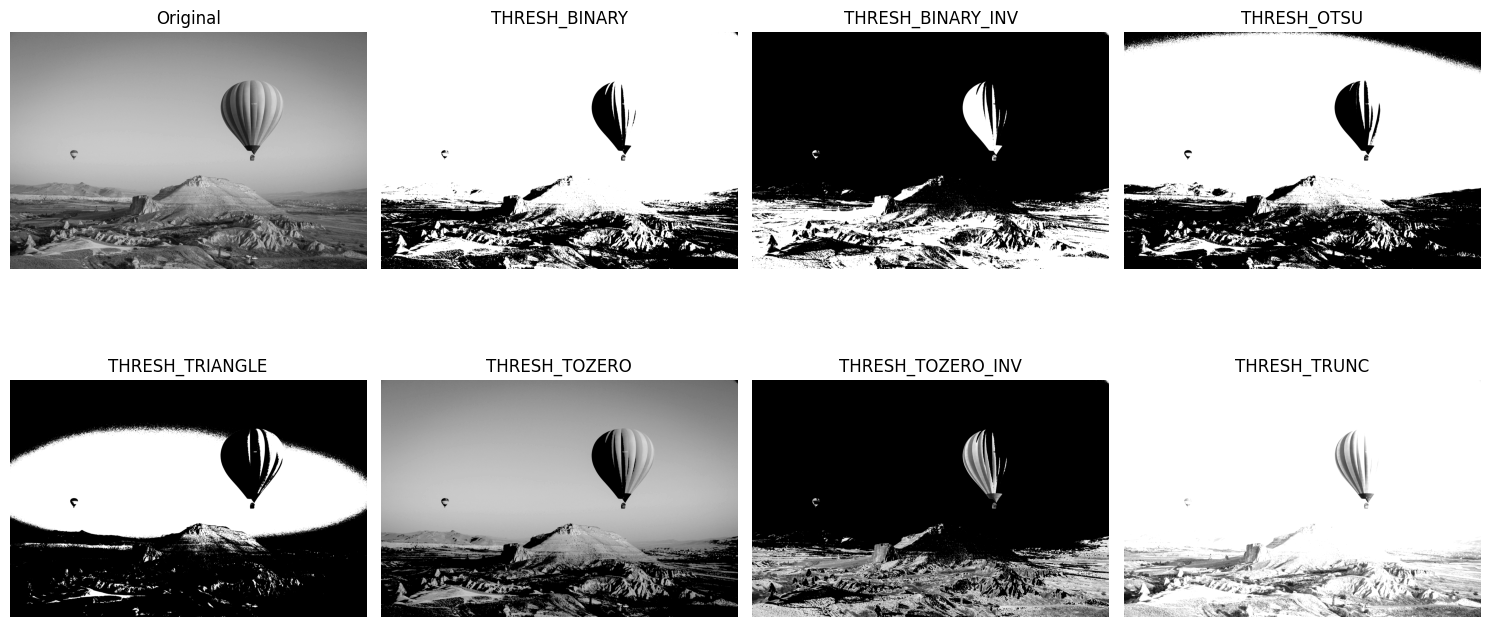

In [101]:
# Store results and titles in lists
titles = [
    "Original",
    "THRESH_BINARY",
    "THRESH_BINARY_INV",
    "THRESH_OTSU",
    "THRESH_TRIANGLE",
    "THRESH_TOZERO",
    "THRESH_TOZERO_INV",
    "THRESH_TRUNC"
]

images = [
    image_grayscale,
    th_binary,
    th_inv_binary,
    th_otsu,
    th_triangle,
    th_tozero,
    th_inv_tozero,
    th_trunc
]

# Plot all images
plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### Image Thresholding Comparison

Each method shows a different way of separating objects (like the balloon) from the background based on pixel intensity.

| Method | Description |
|--------|--------------|
| **THRESH_BINARY** | Converts pixels above a threshold to white, below to black. Simple and clear edges. |
| **THRESH_BINARY_INV** | Inverse of binary — bright becomes dark and vice versa. |
| **THRESH_OTSU** | Automatically finds the best threshold using Otsu’s algorithm — good for bimodal images. |
| **THRESH_TRIANGLE** | Similar to Otsu but more robust for unimodal histograms. |
| **THRESH_TOZERO** | Keeps values above the threshold, sets others to zero — preserves bright areas. |
| **THRESH_TOZERO_INV** | Keeps values below the threshold, sets others to zero — focuses on dark areas. |
| **THRESH_TRUNC** | Caps pixel values at the threshold — reduces brightness variation. |

*These techniques are essential for image segmentation and preprocessing in computer vision.*


##### (b) Adaptive thresholding

In [102]:
# --- Adaptive Mean Thresholding ---
# Parameters explanation:
# image_grayscale: Input grayscale image.
# 255: Maximum value assigned to pixels exceeding the threshold.
# cv2.ADAPTIVE_THRESH_MEAN_C: Threshold is computed as the mean of neighborhood values minus constant C.
# cv2.THRESH_BINARY: Type of thresholding – pixel is set to 255 if above threshold, else 0.
# 7: Block size (odd number) – size of the local neighborhood used to calculate the threshold.
# 2: Constant subtracted from the mean to fine-tune the threshold.

th_adapt_mean = cv2.adaptiveThreshold(
    image_grayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 2
)

# --- Adaptive Gaussian Thresholding ---
# Same parameters, but the threshold is computed as a weighted sum of neighborhood values (Gaussian window)
# instead of a simple mean. This makes it more robust against noise and lighting variations.

th_adapt_gaussian = cv2.adaptiveThreshold(
    image_grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2
)

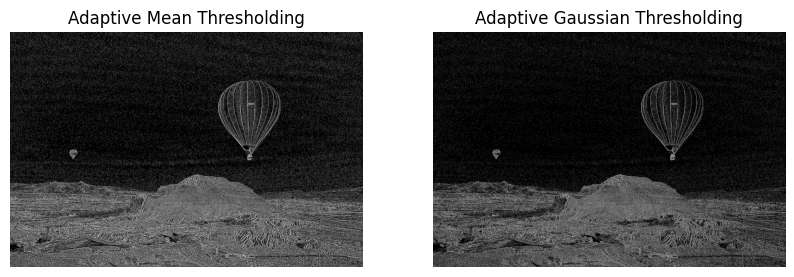

In [103]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(th_adapt_mean, cmap='binary')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(th_adapt_gaussian, cmap='binary')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.show()

### Adaptive Thresholding


- Adaptive Mean Thresholding uses the mean of neighboring pixels — works well with uneven lighting.
- Adaptive Gaussian Thresholding applies a weighted (Gaussian) average, producing smoother transitions and better noise handling.

Adaptive methods calculate the threshold for smaller regions of the image, making them effective under **uneven lighting conditions**.

| Method | Description |
|--------|--------------|
| **ADAPTIVE_THRESH_MEAN_C** | Threshold value is the mean of the neighborhood area minus constant *C*. Good for simple lighting changes. |
| **ADAPTIVE_THRESH_GAUSSIAN_C** | Threshold value is a weighted sum (Gaussian window) of the neighborhood minus *C*. Better for images with gradual lighting variation. |

*Adaptive thresholding dynamically adjusts the threshold for different parts of the image, improving contrast and segmentation in complex scenes.*


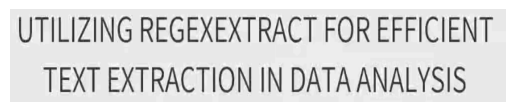

In [104]:
# APPLICATION

img_gray = cv2.imread("Images/0_1_image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap = "gray")
plt.axis("off")
plt.show()

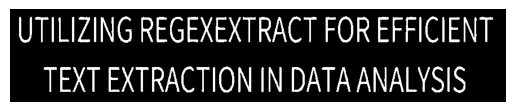

In [107]:
T = 100
_, th_otsu = cv2.threshold(img_gray, T, 255, cv2.THRESH_OTSU)
plt.imshow(th_otsu, cmap = "binary")
plt.axis("off")
plt.show()

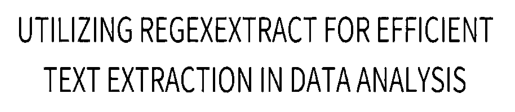

In [106]:
T = 250
_, th_otsu = cv2.threshold(img_gray, T, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(th_otsu, cmap = "binary")
plt.axis("off")
plt.show()